In [20]:
import numpy as np
import matplotlib.pyplot as plt

(200, 329, 3)


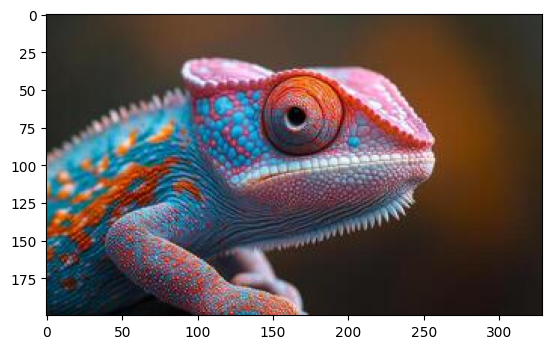

In [21]:
img = plt.imread('img.jpg')

print(img.shape)
plt.imshow(img)
plt.show()

In [22]:
def euclidean_distance(x1,x2):
    return np.sqrt(np.sum((x1 - x2)**2))

In [23]:
def define_centroids(X, k):
    X = np.array(X)
    n_samples, n_features = X.shape
    centroids = np.zeros((k, n_features))
    for i in range(k):
        centroid = X[np.random.choice(range(n_samples))]
        centroids[i] = centroid
    return centroids

In [24]:
def assign_clusters(X, centroids):
    clusters = []
    for x in X:
        distances = [euclidean_distance(x, centroid) for centroid in centroids]
        cluster = np.argmin(distances)
        clusters.append(cluster)
    return np.array(clusters)

def update_centroids(X, clusters, k):
    n_features = X.shape[1]
    new_centroids = np.zeros((k, n_features))
    for i in range(k):
        points_in_cluster = X[np.array(clusters) == i]
        if len(points_in_cluster) > 0:
            new_centroids[i] = points_in_cluster.mean(axis=0)
    return new_centroids

In [25]:
def kmeans(data, number_of_clusters):

    X = np.array(data)
    
    centroids = define_centroids(X, number_of_clusters)

    for _ in range(100):  
        
        clusters = assign_clusters(X, centroids)
        
        new_centroids = update_centroids(X, clusters, number_of_clusters)

        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids

    return centroids, clusters

(65800,)
(6, 3)


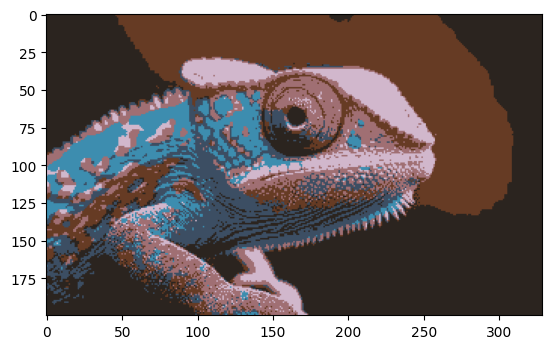

In [27]:
pixels = img.flatten().reshape(-1, 3)

centroids, clusters = kmeans(pixels, 6)

print(clusters.shape) 
print(centroids.shape)  

for i in range(len(centroids)):

    pixels[clusters == i] = centroids[i]

pixels = pixels.reshape(img.shape)

plt.imshow(pixels)
plt.show()